### Zadanie 1
Na bazie zbioru MNIST przenalizuj wpływ parametru batch_size na szybkość uczenia oraz na jakość klasyfikacji


In [1]:
import tensorflow as tf
import time
import pandas as pd

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
results = []

for batch_size in batch_sizes:
    model = create_model()
    start_time = time.time()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5)
    train_time = time.time() - start_time
    val_loss, val_acc = model.evaluate(x_test, y_test)
    results.append((batch_size, train_time, val_acc, val_loss))

results_df = pd.DataFrame(results, columns=["Batch Size", "Czas (s)", "Dokładność", "Błąd"])

print(results_df)

Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 67s 1ms/step - accuracy: 0.8985 - loss: 0.3367
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - accuracy: 0.9637 - loss: 0.1336
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - accuracy: 0.9707 - loss: 0.1142
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.9742 - loss: 0.1075
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - accuracy: 0.9755 - loss: 0.0991
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9531 - loss: 0.3095
Epoch 1/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.8977 - loss: 0.3322
Epoch 2/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9676 - loss: 0.1103
Epoch 3/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9752 - loss: 0.0857
Epoch 4/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - accuracy: 0.9803 - loss: 0.0679
Epoch 5/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9831 - loss: 0.0612
313/313 ━━━━━━━━━━━━━━━

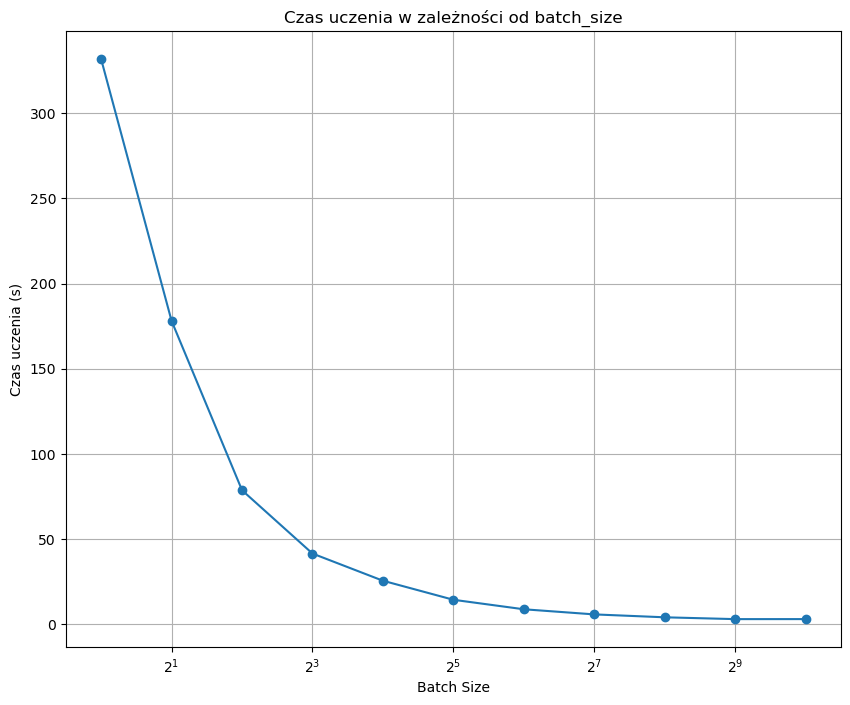

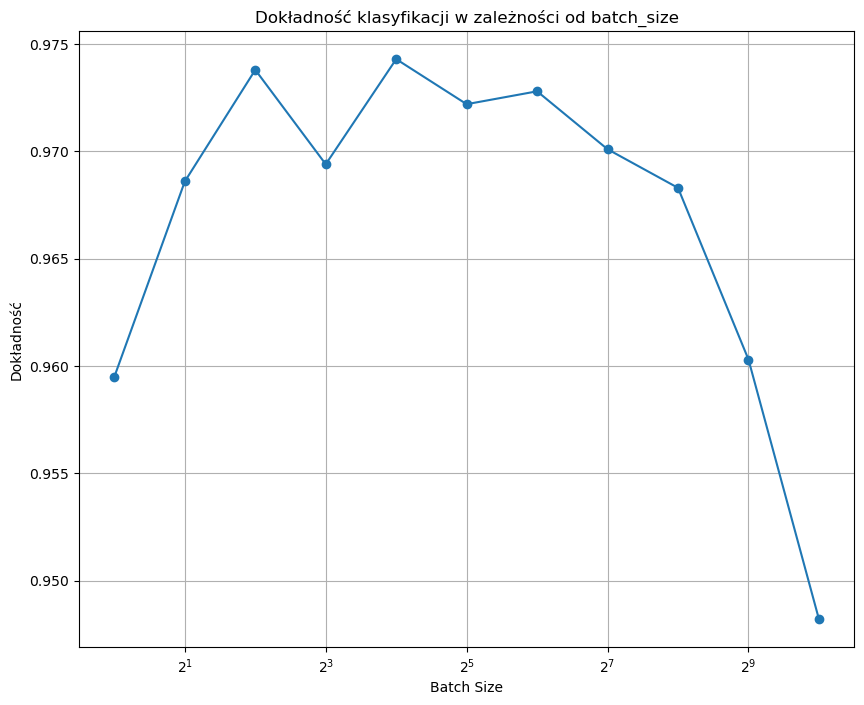

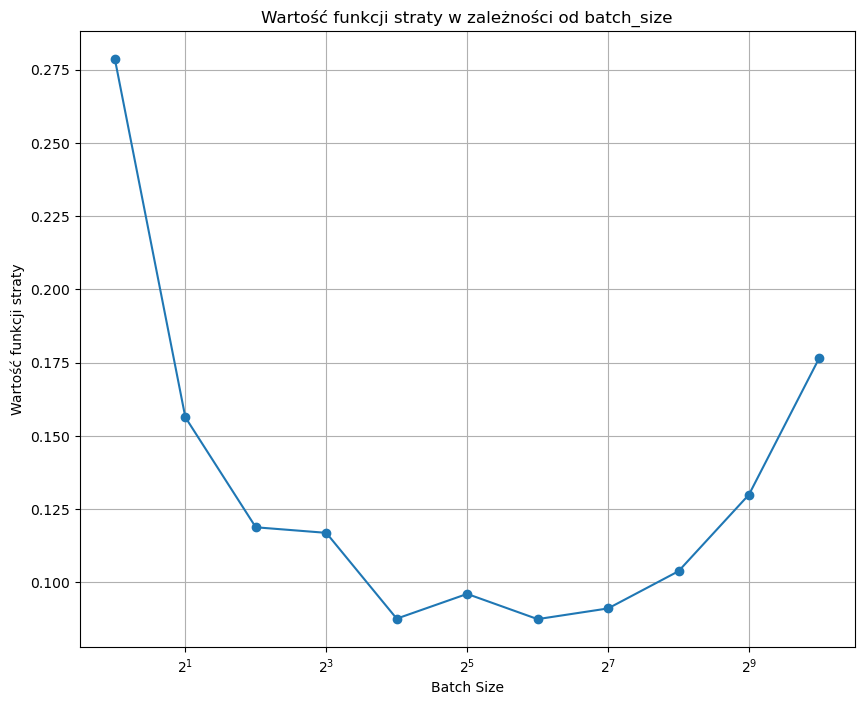

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(results_df["Batch Size"], results_df["Czas (s)"], marker='o')
plt.title("Czas uczenia w zależności od batch_size")
plt.xlabel("Batch Size")
plt.ylabel("Czas uczenia (s)")
plt.grid()
plt.xscale('log', base=2)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(results_df["Batch Size"], results_df["Dokładność"], marker='o')
plt.title("Dokładność klasyfikacji w zależności od batch_size")
plt.xlabel("Batch Size")
plt.ylabel("Dokładność")
plt.grid()
plt.xscale('log', base=2)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(results_df["Batch Size"], results_df["Błąd"], marker='o')
plt.title("Wartość funkcji straty w zależności od batch_size")
plt.xlabel("Batch Size")
plt.ylabel("Wartość funkcji straty")
plt.grid()
plt.xscale('log', base=2)
plt.show()

### Zadanie 2
Na bazie zbiorów danych: Dane1 (zbiór uczący i testowy) oraz Dane2 oceń wpływ parametrów sieci neuronowych na szybkość działania oraz jakość uzyskanych wyników.


### Regresja

In [3]:
import numpy as np
import pandas as pd
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

dane1_test = pd.read_csv('Perceptron_dane1_test.txt', sep='\t')
dane1_train = pd.read_csv('Perceptron_dane1_ucz.txt', sep='\t')

def prepare_data(data):
    X = data[['x']].to_numpy()
    y = data['y'].to_numpy()
    return X, y

X1_test, y1_test = prepare_data(dane1_test)
X1_train, y1_train = prepare_data(dane1_train)

def train_network(X_train, y_train, X_test, y_test, activation, optimizer, layers):
    model = Sequential()

    for neurons in layers:
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='tanh'))

    model.compile(optimizer=optimizer, loss='MeanSquaredError', metrics=['mse'])
    start_time = time.time()
    
    model.fit(X_train, y_train, epochs=50, batch_size=10)
    end_time = time.time()
    metrics = model.evaluate(X_test, y_test)
    y_prediction = model.predict(X_test)

    return metrics, end_time - start_time, y_prediction

layers_count = [3, 5]
neurons_per_layer_config = [64, 128]
activations = ['relu', 'sigmoid']
optimizers = ['adam', 'sgd']

results = []
predictions = []

for num_layers in layers_count:
    for neurons_per_layer in neurons_per_layer_config:
        for activation in activations:
            for optimizer in optimizers:
                metrics, duration, y1_prediction = train_network(X1_train, y1_train, X1_test, y1_test, 
                                                    activation=activation, 
                                                    optimizer=optimizer, 
                                                    layers=np.full(num_layers, neurons_per_layer, dtype=int))
                results.append({
                    "activation": activation,
                    "optimizer": optimizer,
                    "num_layers": num_layers,
                    "neurons_per_layer": neurons_per_layer,
                    "mse": metrics[0],
                    "duration": duration
                })
                predictions.append(y1_prediction.flatten())
    
results_df = pd.DataFrame(results)
print(results_df)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5223 - mse: 0.5223
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4526 - mse: 0.4526 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4598 - mse: 0.4598 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4890 - mse: 0.4890 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4927 - mse: 0.4927 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4470 - mse: 0.4470 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4760 - mse: 0.4760 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4439 - mse: 0.4439 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4446 - mse: 0.4446 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4384 - mse: 0.4384 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3639 - mse: 0.3639 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3633 - mse: 0.3633 
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━

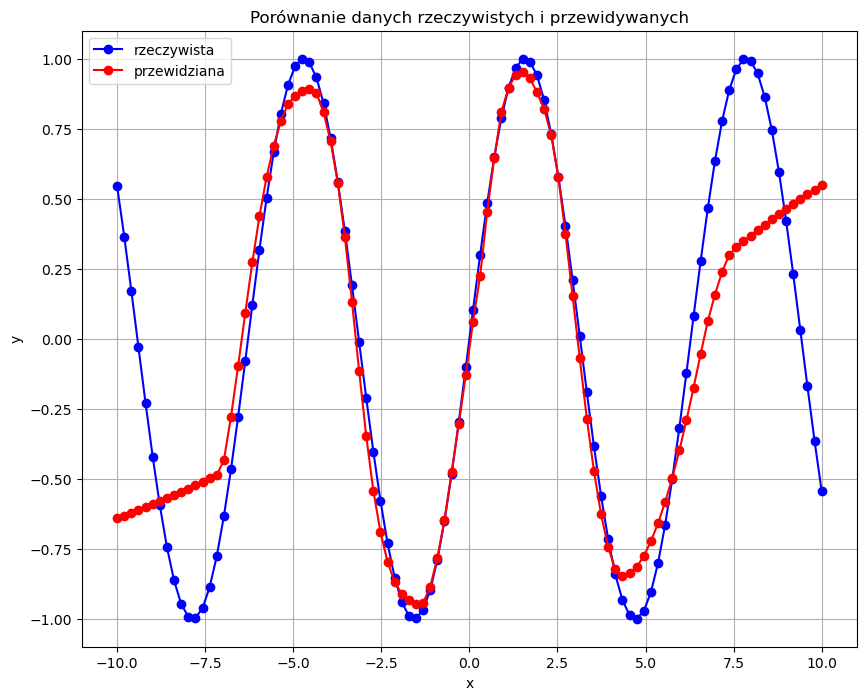

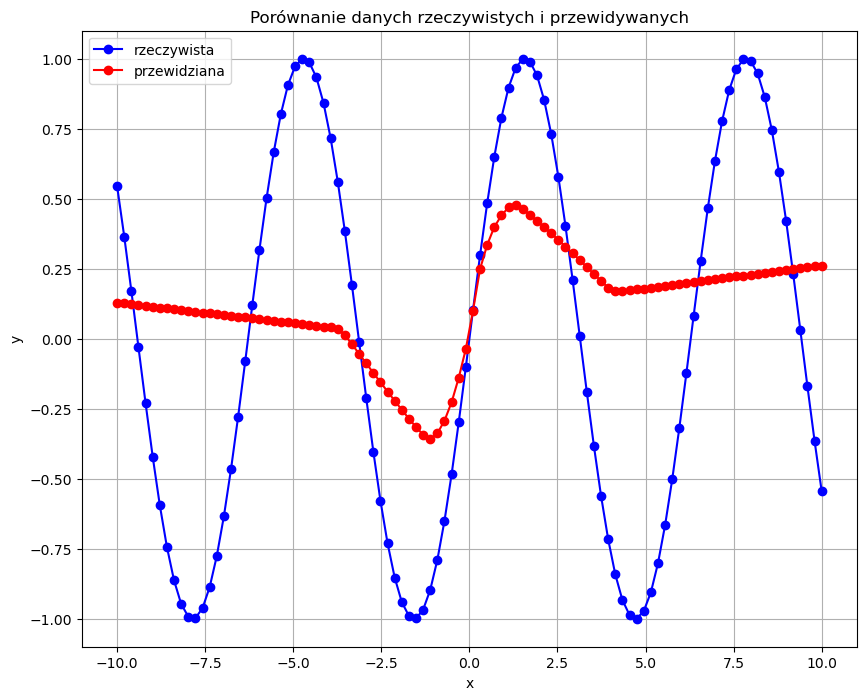

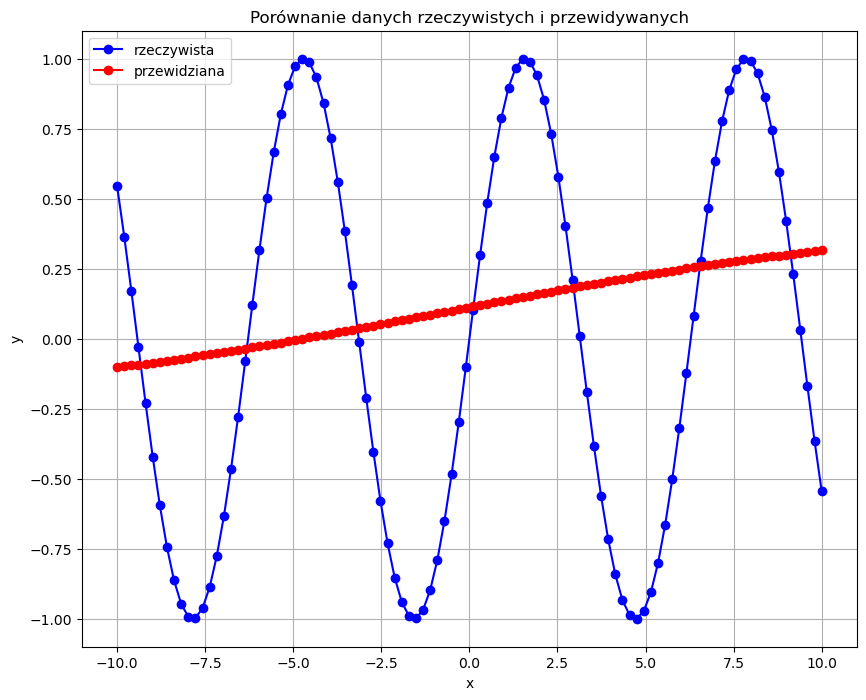

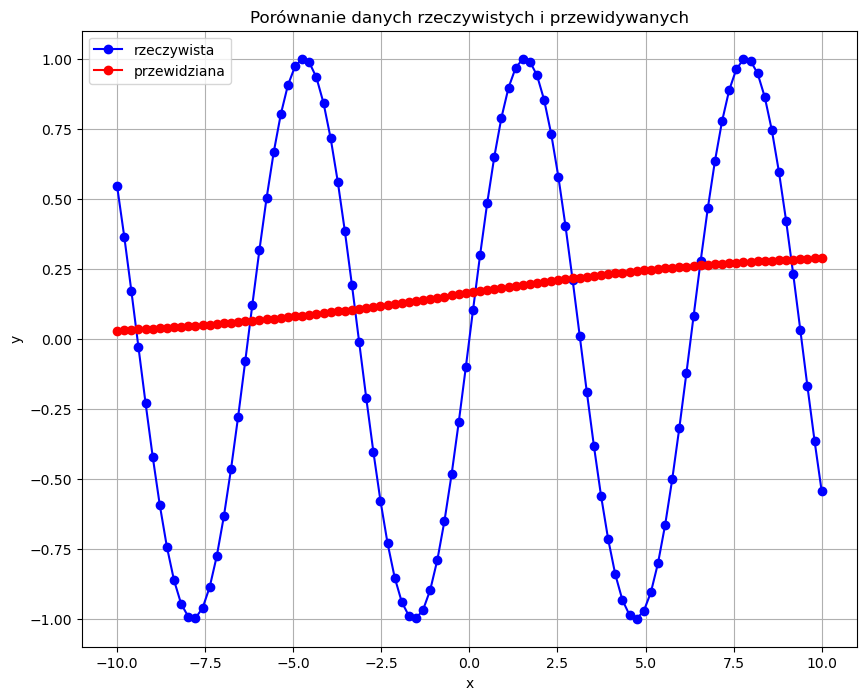

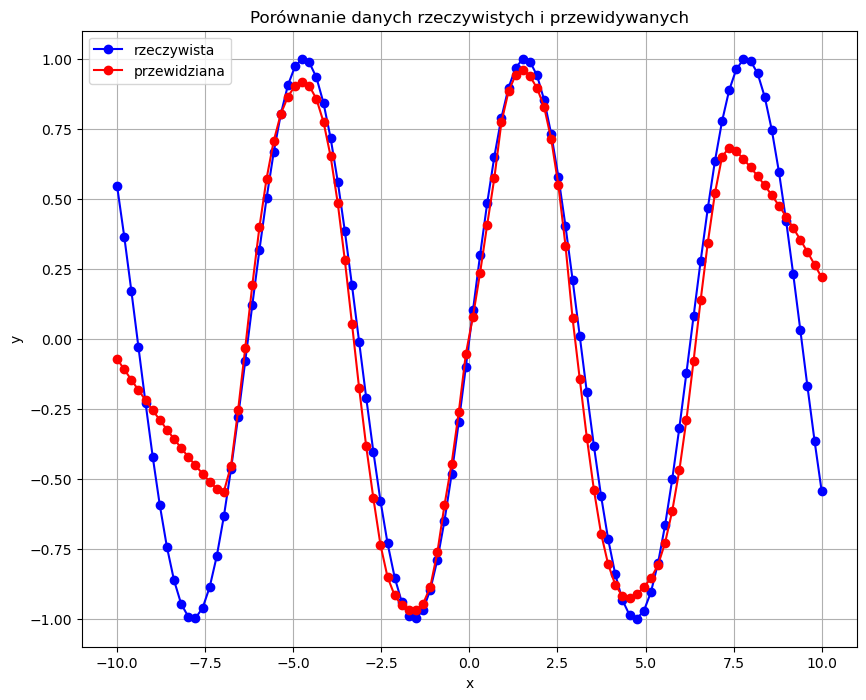

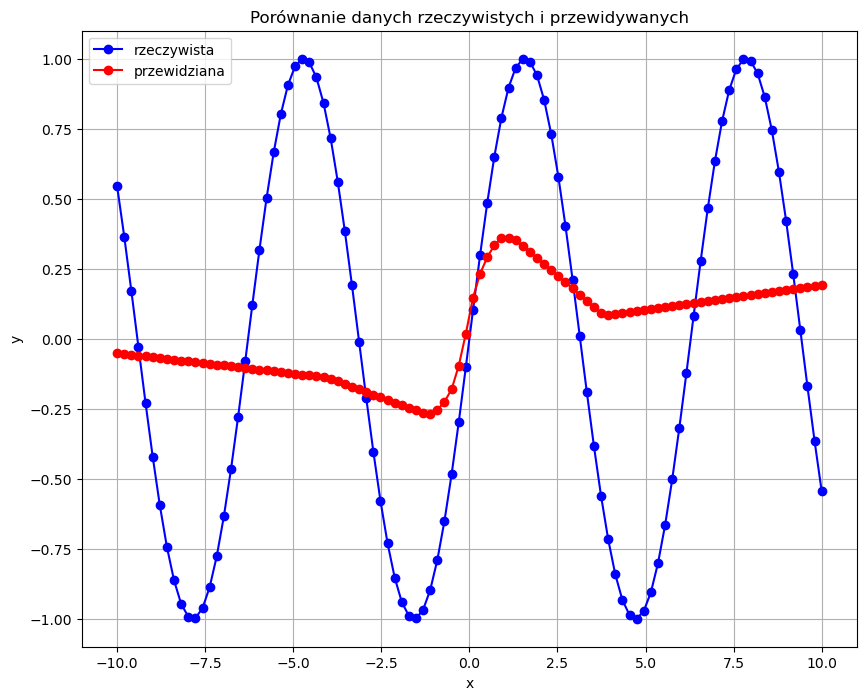

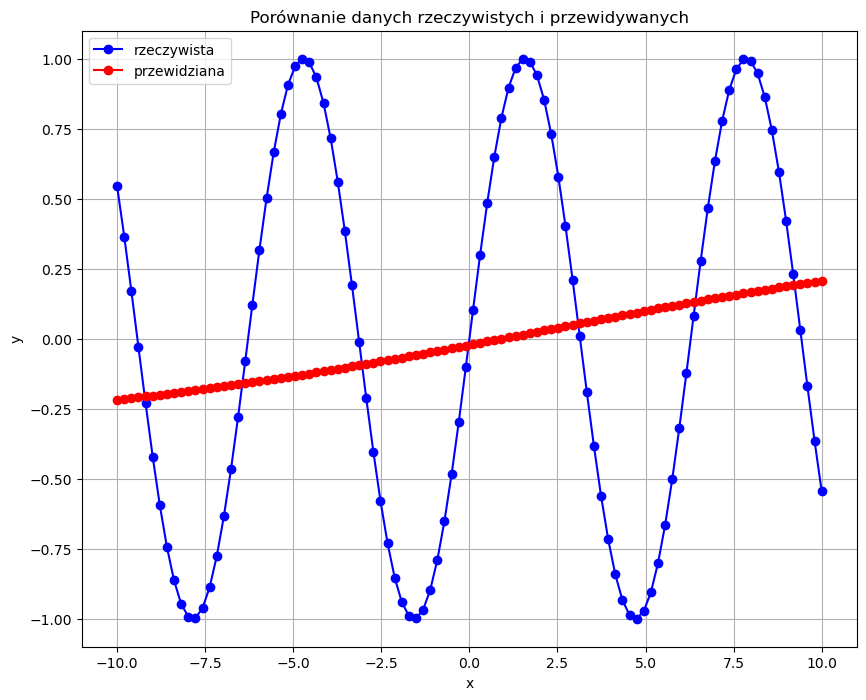

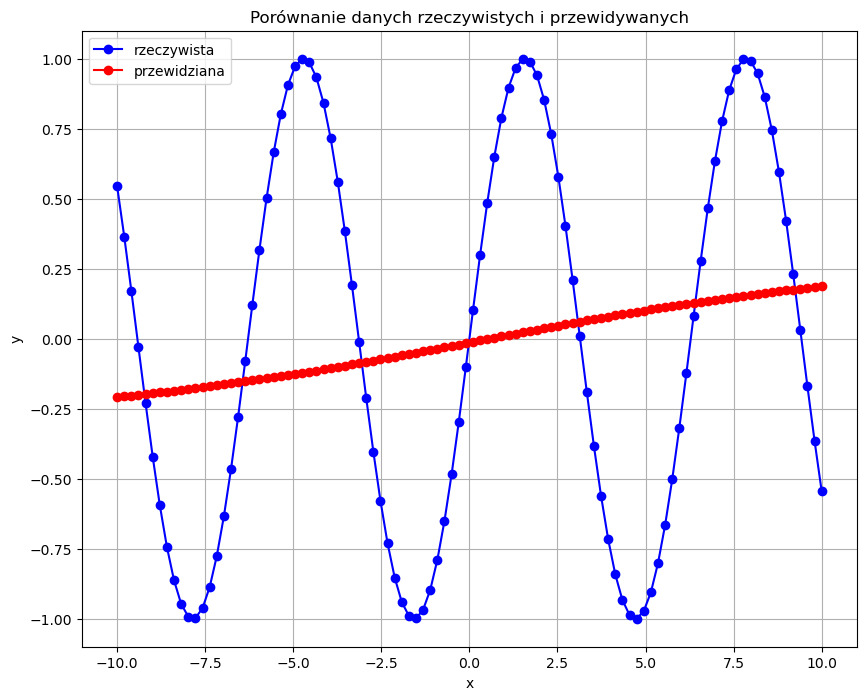

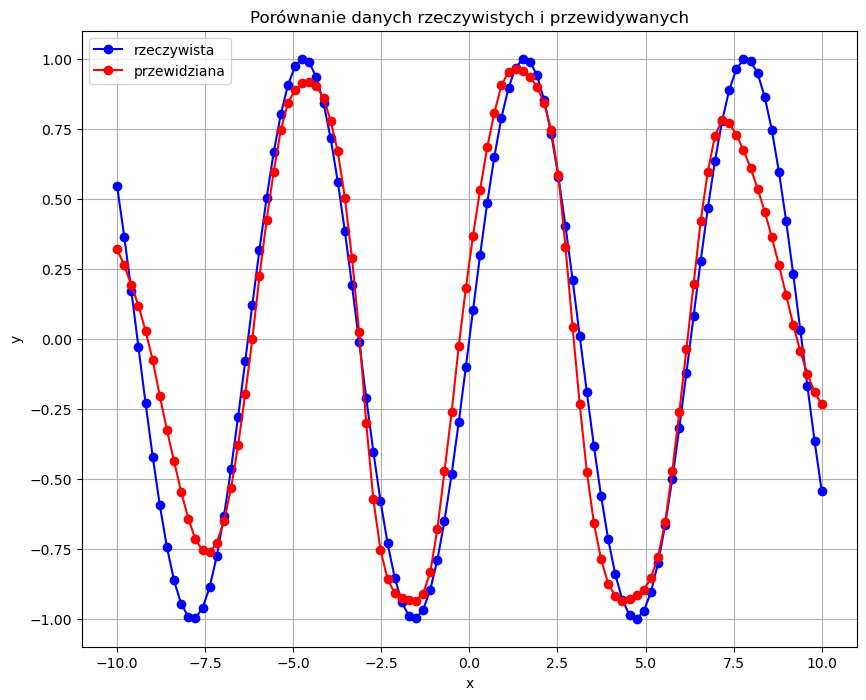

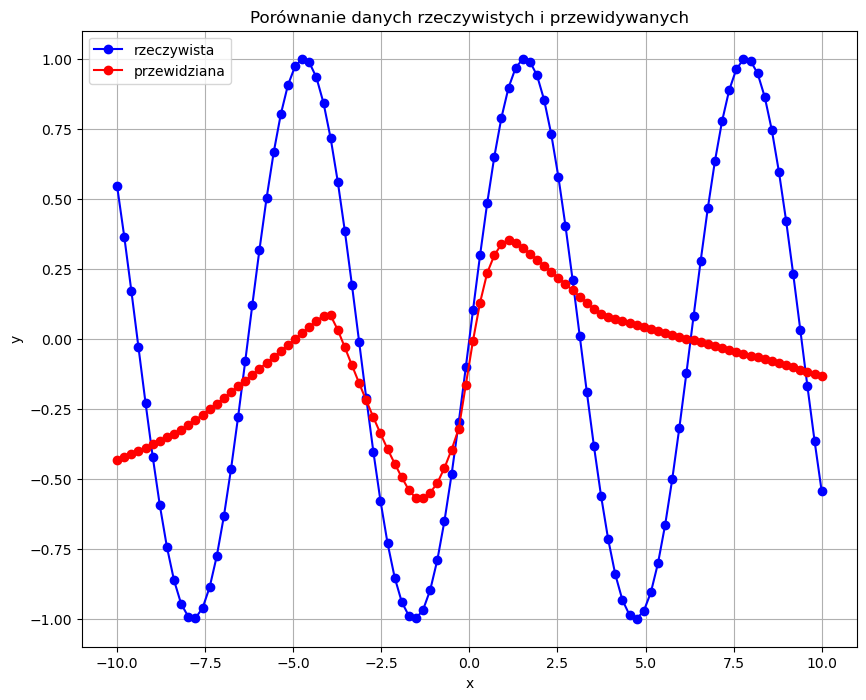

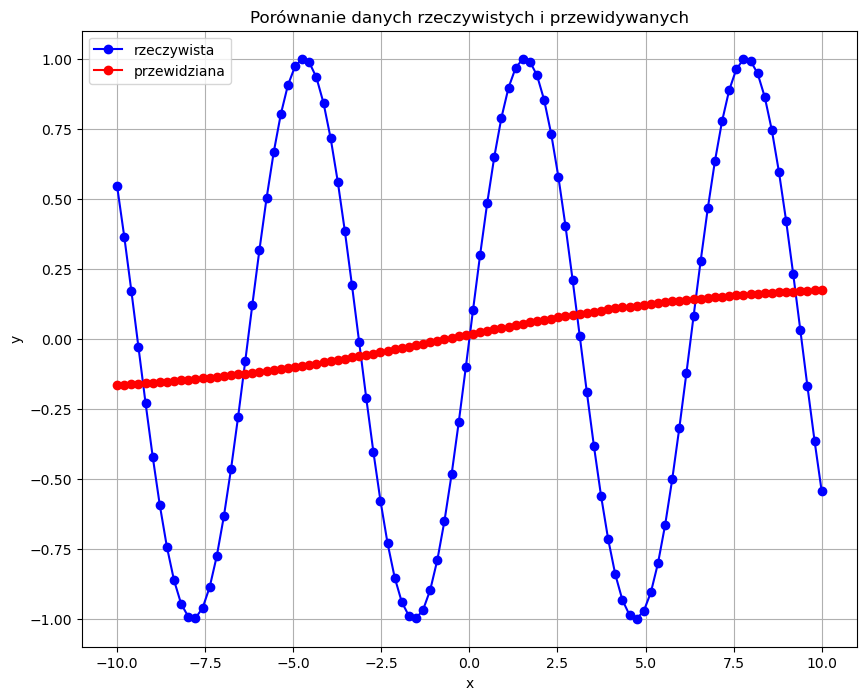

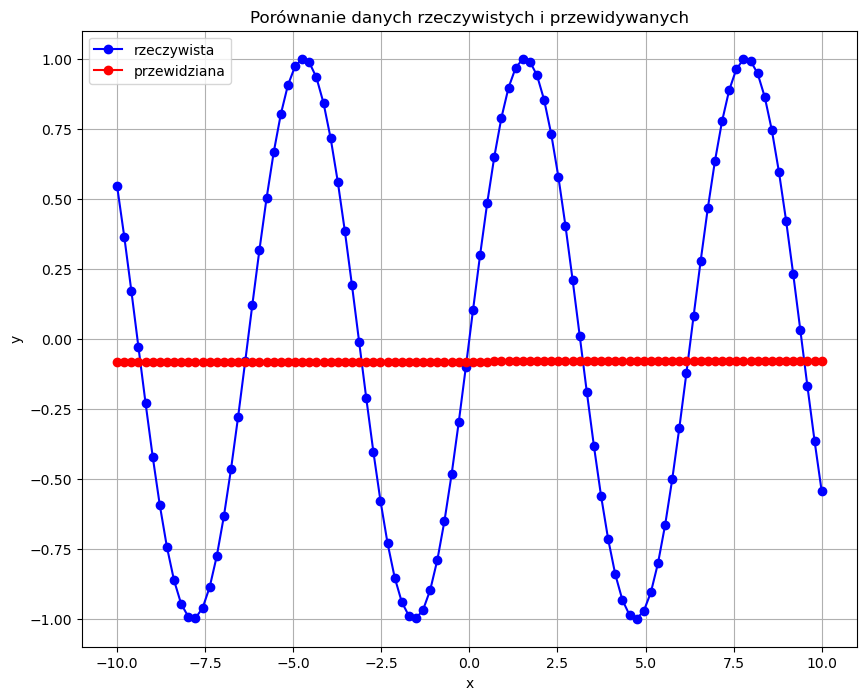

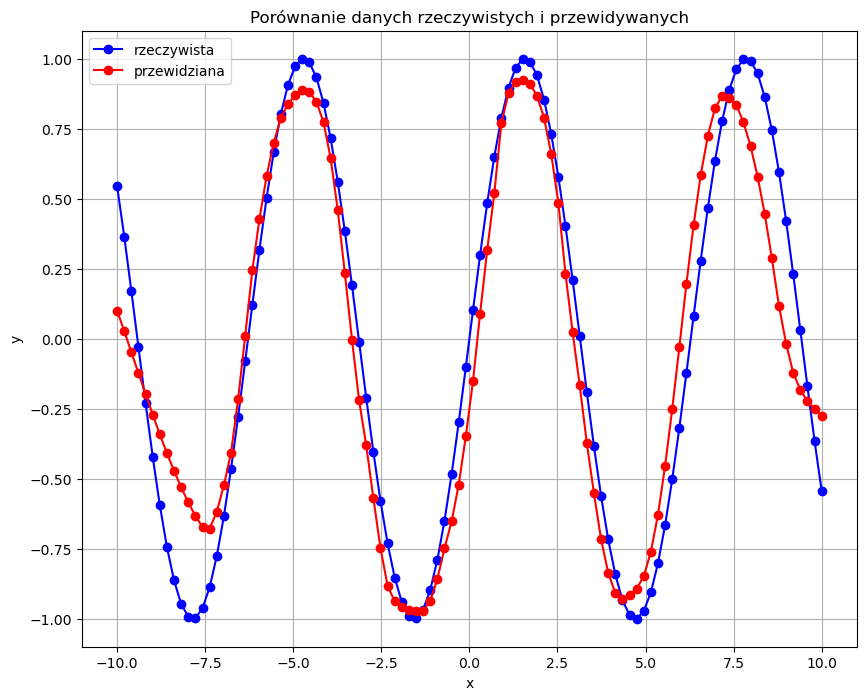

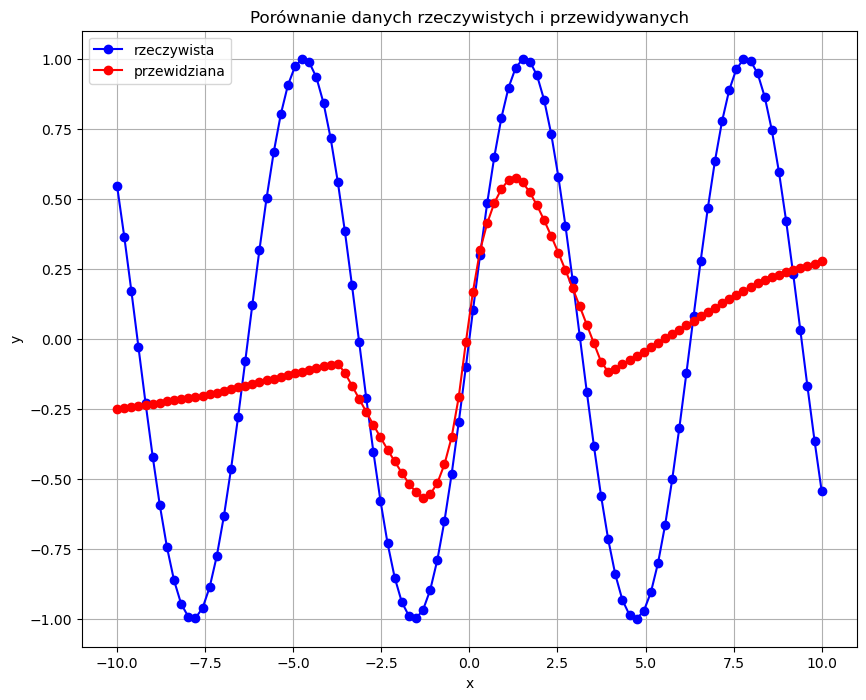

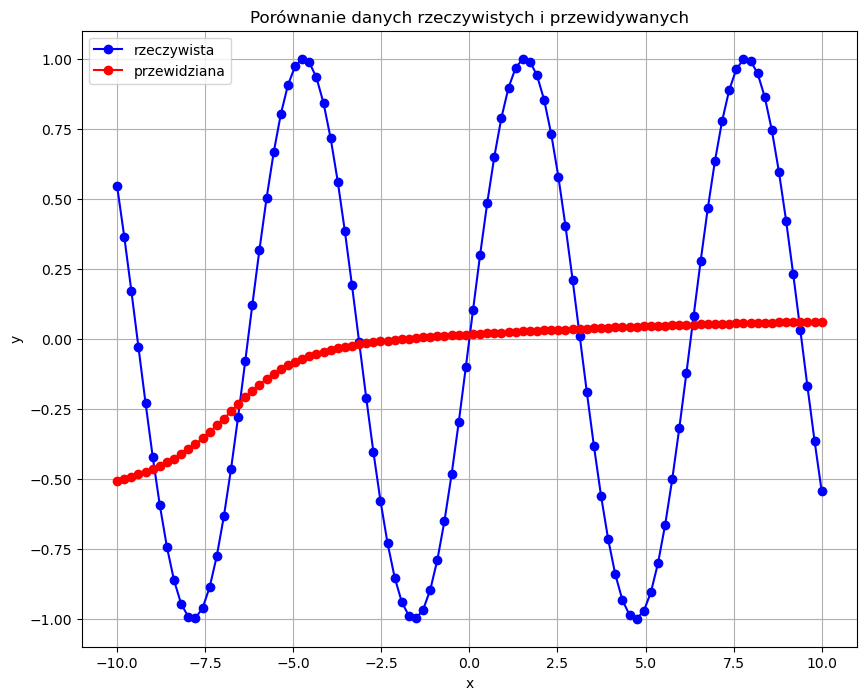

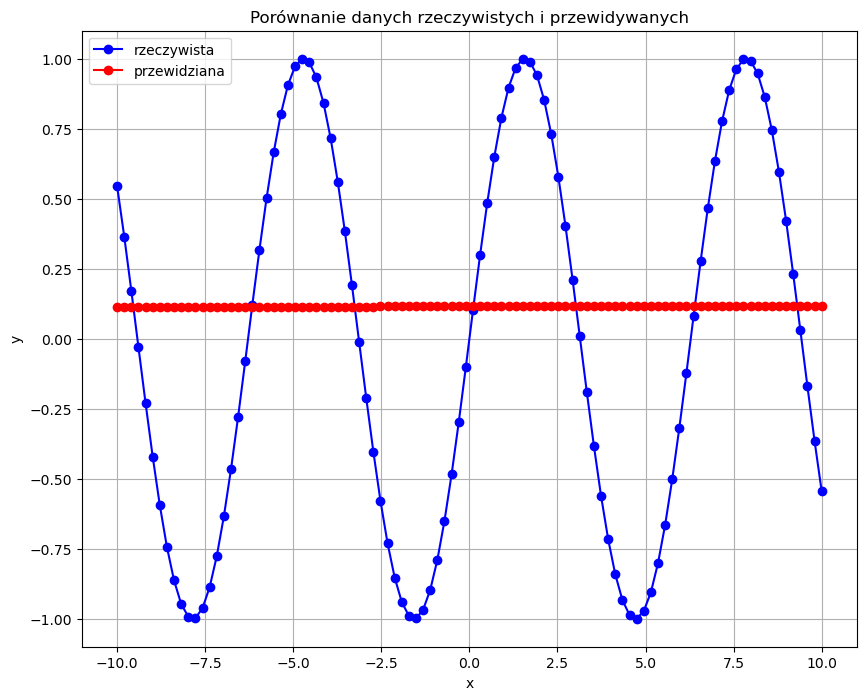

In [4]:
import matplotlib.pyplot as plt

for y in predictions:
    plt.figure(figsize=(10, 8))
    plt.plot(X1_test, y1_test, marker='o', color='blue', label="rzeczywista")
    plt.plot(X1_test, y, marker='o', color='red', label="przewidziana")
    plt.title("Porównanie danych rzeczywistych i przewidywanych")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()

### Klasyfikacja

In [5]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time

classification_data = pd.read_csv('Perceptron_dane_kl.txt', sep="\t")

X_cls = classification_data[['x1', 'x2', 'x3', 'x4']].values
y_cls = classification_data['klasa'].values

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

def create_model(input_dim, num_layers, neurons_per_layer, activation, optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation))
    model.add(tf.keras.layers.Dense(len(set(y_cls)), activation=tf.keras.activations.softmax))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

layers_count = [3, 5]
neurons_per_layer_config = [64, 128]
activations = ['relu', 'elu']
optimizers = ['adam', 'nadam']

classification_results = []

for num_layers in layers_count:
    for neurons_per_layer in neurons_per_layer_config:
        for activation in activations:
            for optimizer in optimizers:
                model = create_model(
                    X_cls_train.shape[1], num_layers, neurons_per_layer, activation, optimizer
                )
                start_time = time.time()
                model.fit(X_cls_train, y_cls_train, epochs=5, batch_size=32)
                train_time = time.time() - start_time
                loss, accuracy = model.evaluate(X_cls_test, y_cls_test)
                classification_results.append({
                    "L. warstw": num_layers,
                    "L. neuronów": neurons_per_layer,
                    "F. aktywacji": activation,
                    "Algorytm": optimizer,
                    "Czas uczenia": train_time,
                    "Dokładność": accuracy
                })

classification_results_df = pd.DataFrame(classification_results)

print(classification_results_df)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4065 - loss: 1.0656
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 0.9076 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7995 - loss: 0.8156
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9473 - loss: 0.7478 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9664 - loss: 0.6529 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.5499 
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2785 - loss: 1.2896
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6278 - loss: 0.9739 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9376 - loss: 0.9068 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8553 - loss: 0.8510 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6639 - loss: 0.7856
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7137 - loss: 0.7088 
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1